Before moving forward, let’s define two fundamental Matplotlib object types: **Figure** and **Axes**.

The figure can be considered as the outermost container that holds everything together. All other objects stay alive in this container. A Figure can have one or more Axes objects. In fact, we need Axes to object to actually draw something. **Each subplot on a Figure is actually an Axes object**.

# Datasets

We will be using two different datasets for the examples in this article. The first one is a Pandas DataFrame with dates and random numbers:

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({
    "date": pd.date_range(start="2022-09-01", freq="D", periods=20),
    "store1": np.random.randint(80, 100, size=20),
    "store2": np.random.randint(50, 70, size=20)
})
df.head()

,date,store1,store2
0,2022-09-01,99,59
1,2022-09-02,98,57
2,2022-09-03,91,64
3,2022-09-04,96,52
4,2022-09-05,91,58


The second one is a sample sales dataset I created with mock data. You can download it from the [datasets](https://github.com/SonerYldrm/datasets) repository on my GitHub page. The dataset we will use in this article is called sales data with stores. Let’s create a Pandas DataFrame by reading this dataset. We will also do some filtering to eliminate outliers.

In [3]:
sales = pd.read_csv(
   "data/sales_data_with_stores.csv",
   usecols=["store", "product_code", "cost", "price", "last_week_sales"]
)
sales = sales[
   (sales["cost"] > 50) & (sales["cost"] < 500)
].reset_index(drop=True)
sales.head()

,store,product_code,cost,price,last_week_sales
0,Violet,4187,420.76,569.91,13
1,Daisy,2650,59.40,111.06,15
2,Rose,3997,85.50,132.91,32
3,Violet,4003,88.86,132.91,46
4,Violet,5211,68.52,94.91,48


# Overlapping Axes objects

We can add multiple Axes objects to a Figure by placing them on top of each other, as shown below. Their sizes are actually the same. I drew them differently for demonstration purposes. The Axes objects share the same x-axis and y-axis by default.

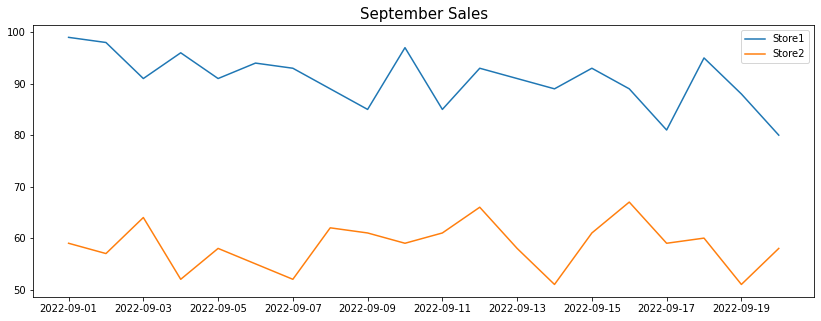

In [4]:
import matplotlib.pyplot as plt
# create a Figure object
plt.figure(figsize=(14,5))
# Figure title
plt.title("September Sales", fontsize=15)
# first Axes
plt.plot(df["date"], df["store1"])
# second Axes
plt.plot(df["date"], df["store2"])
# add legend
plt.legend(["Store1", "Store2"])
plt.show()

The values for both stores are between 50 and 100, so they can share the same y-axis. In cases where there is a huge difference in the y-values, we should consider adding a [secondary y-axis](https://towardsdatascience.com/3-tricks-to-prettify-matplotlib-plots-d0a73b861c09).

# Axes objects in different positions

There are two steps in this process:

- Arrangement of the positions of Axes objects

- Creating plots on each Axes object

The arrangement can be made using the `add_subplot` or `subplot` functions. The subplot function is a wrapper of `add_subplot` and is a more frequently used one.

We first create the schema for subplots. The `nrows` and `ncols` parameters can be used for this task. For instance, the line of code below creates a Figure with 4 Axes objects.

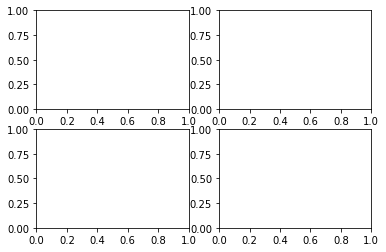

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=2)

We can create as many Axes objects as needed. Each Axes can be accessed with its index.

Let’s create a Figure with 2 Axes and plot the histograms of the cost and price columns in the sales DataFrame.

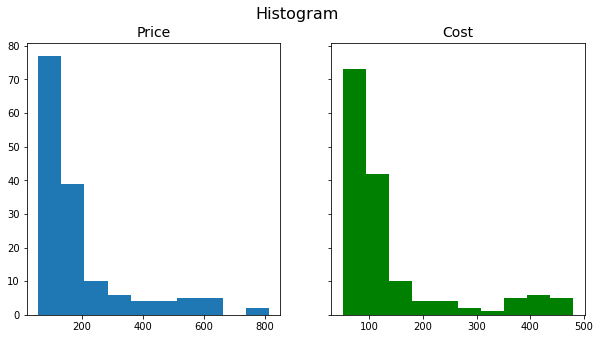

In [6]:
# Figure with 2 Axes objects
fig, axs = plt.subplots(
    figsize=(10, 5),
    ncols=2,
    sharey=True
)
# Figure title
fig.suptitle("Histogram", fontsize=16)
# First Axes
axs[0].hist(sales["price"])
axs[0].set_title("Price", fontsize=14)
# Second Axes
axs[1].hist(sales["cost"], color="green")
axs[1].set_title("Cost", fontsize=14)
plt.show()

The `sharex` and `sharey` parameters can be used to eliminate redundant axis ticks. For instance, in the Figure above, both plots can have the same y-axis, so we can remove the y-axis from the left one. This can be achieved by setting the value of the `sharey` parameter as True.

# Subplot2grid

The subplot function divides the Figure into cells, and each subplot occupies one cell. The `subplot2grid` function adds more flexibility to this. It lets subplots occupy multiple cells so we can create grid structures.

The `subplot2grid` function requires you to define the geometry of the plot and the location of the plot in the grid. The example above is a two-by-two grid. The position of the subplot on top is defined as the first row and first column. It spans over 2 columns. The ones on the bottom are the second-row plots, and each occupies a single cell.

We can create this structure with Matplotlib as follows:

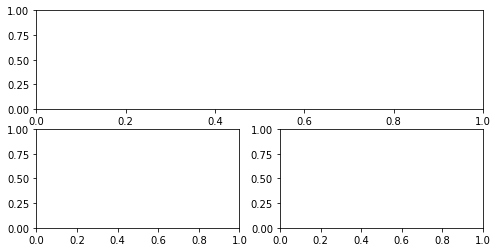

In [7]:
# Create Figure
plt.figure(figsize=(8,4))
# top
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
# bottom left
ax2 = plt.subplot2grid((2, 2), (1, 0))
# bottom right
ax2 = plt.subplot2grid((2, 2), (1, 1))
plt.show()

The `colspan` and `rowspan` parameters are used for creating subplots that occupy more than one cell.

The drawing below is a more complicated grid, which contains subplots spanned over columns and rows.

Let’s create this grid with Matplotlib. This is a three-by-three grid.

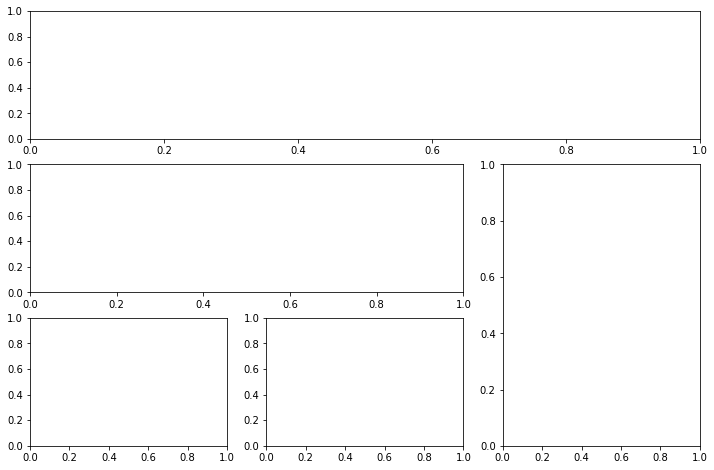

In [8]:
# Create Figure
plt.figure(figsize=(12,8))
# Create subplots
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax5 = plt.subplot2grid((3, 3), (2, 1))